In [1]:
"""
Anit Mathew
CMPS 530 01
This program implements a series of data visulaization plotting for the project. 
"""

# importing required libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# reading the dataset
df = pd.read_csv('C:/Python_course/Project/dataset.csv')
df.head(5) # displaying the data

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathroom,price,minstay,last_modified,latitude,longitude,location
0,11637213,1436,24705242,Shared room,NaN,San Diego,NaN,Pacific Beach,2,0.0,2,1,NaN,63,NaN,19:23.0,32.795259,-117.252712,0101000020E6100000A2D3F36E2C505DC0C26C020CCB65...
1,14351163,1436,87948847,Shared room,NaN,San Diego,NaN,Mountain View,0,0.0,1,1,NaN,80,NaN,19:23.0,32.699822,-117.106789,0101000020E6100000A5A487A1D5465DC0BA826DC49359...
2,9327098,1436,31043523,Shared room,NaN,San Diego,NaN,Tierrasanta,0,0.0,2,1,NaN,75,NaN,19:23.0,32.836102,-117.084967,0101000020E6100000508F6D1970455DC0620FED63056B...
3,17535919,1436,117987352,Shared room,NaN,San Diego,NaN,Pacific Beach,1,0.0,3,1,NaN,70,NaN,19:23.0,32.801236,-117.241454,0101000020E6100000425F7AFB734F5DC05E30B8E68E66...
4,3688119,1436,13209607,Shared room,NaN,San Diego,NaN,Cortez Hill,1,0.0,2,1,NaN,78,NaN,19:23.0,32.724846,-117.165529,0101000020E61000008962F206984A5DC07651F4C0C75C...


In [2]:
# To convert NaN values to 0 for preparation for Modelling
df = df.fillna(0)
# Checking to ensure that there are no NULL entries
result = df.isnull().sum()
count = 0
for item in result:
    if item != 0:
        count += 1
if count == 0:
    print("Data is cleaned and has no null values")        
else:
    print("Data has null values")


Data is cleaned and has no null values


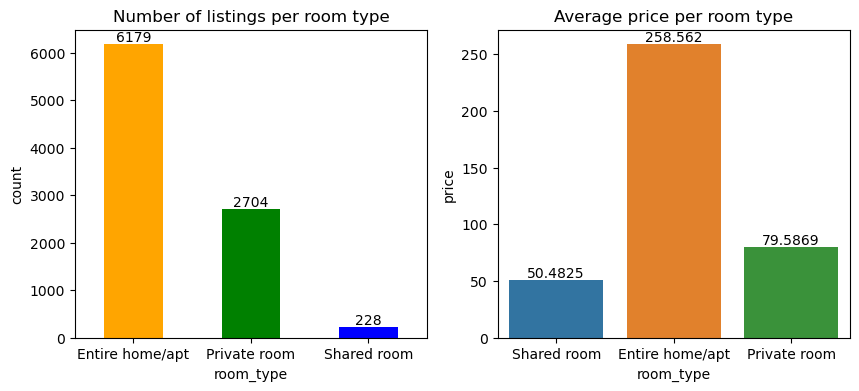

In [3]:
'''
Code to count number of listing and calculating average prices for type of listing. 
Also, to plot the results on a bar plot. 

'''
# plotting number of listings per room type. 
plot1 = df[['room_type', 'price']]
# calculating average of prices and plotting the listings per room type. 
fig, axes = plt.subplots(nrows=1, ncols=2)
# plotting barplot of number of listings per room type
num_list_plot = plot1['room_type'].value_counts().plot(kind='bar', figsize=(10, 4), rot=0, ax=axes[0], color=["orange", "green", "blue"])
# to display the count over every bar
for i in num_list_plot.containers:
    num_list_plot.bar_label(i,)
# labeling x axis
axes[0].set_xlabel("room_type")
# labeling y axis
axes[0].set_ylabel("count")
# plot title
axes[0].set_title("Number of listings per room type")
# plotting barplot of average per per room type
bp = sb.barplot(ax=axes[1], x='room_type', y='price', data=plot1, ci=False)
# to display the count over every bar
for i in bp.containers:
    bp.bar_label(i,)
# plot title
axes[1].set_title("Average price per room type")
# saving plot
plt.savefig('Number of listings per room type.png', bbox_inches='tight')
plt.show()


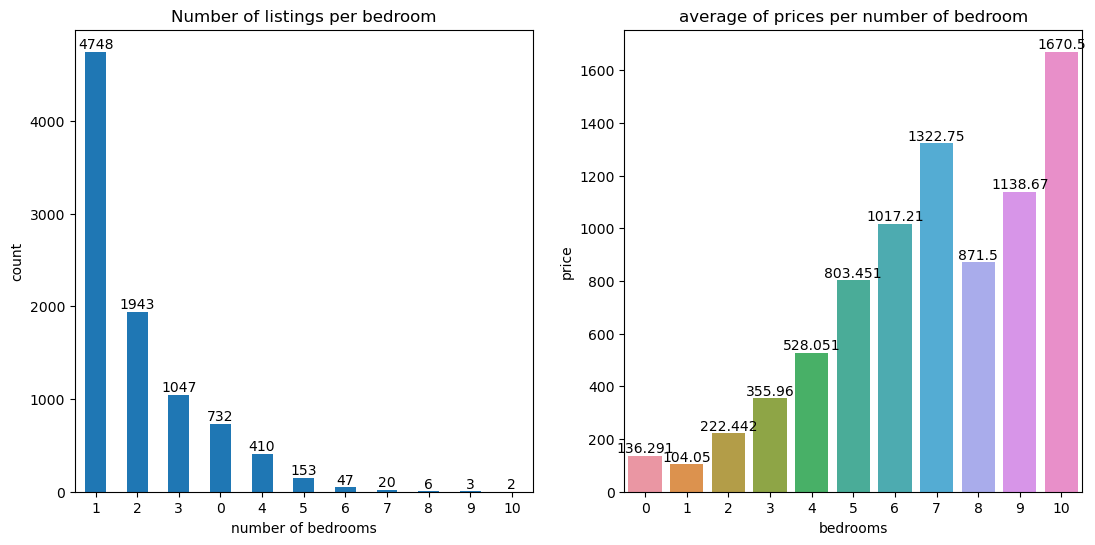

In [4]:
'''
Code to count number of listing and calculating average prices as per number of bedrooms. 
Also, to plot the results on a bar plot. 

'''
plot2 = df[['bedrooms', 'price']]
# calculating average of prices and plotting the listings per number of bedroom. 
fig, axes = plt.subplots(nrows=1, ncols=2)
# plotting barplot of number of listings per bedroom
plt_num_bedrooms = plot2['bedrooms'].value_counts().plot(kind='bar', figsize=(13, 6), rot=0, ax=axes[0])
# to display the count over every bar
for i in plt_num_bedrooms.containers:
    plt_num_bedrooms.bar_label(i,)
# labeling x axis
axes[0].set_xlabel("number of bedrooms")
# labeling y axis
axes[0].set_ylabel("count")
# setting title
axes[0].set_title("Number of listings per bedroom")
# plotting barplot of average of prices per number of bedroom
bp_bedrooms = sb.barplot(ax=axes[1], x='bedrooms', y='price', data=plot2, ci=False)
# to display the count over every bar
for i in bp_bedrooms.containers:
    bp_bedrooms.bar_label(i,)
# setting title
axes[1].set_title("average of prices per number of bedroom")
# saving plot
plt.savefig('Number of listings vs bedrooom.png', bbox_inches='tight')
plt.show()



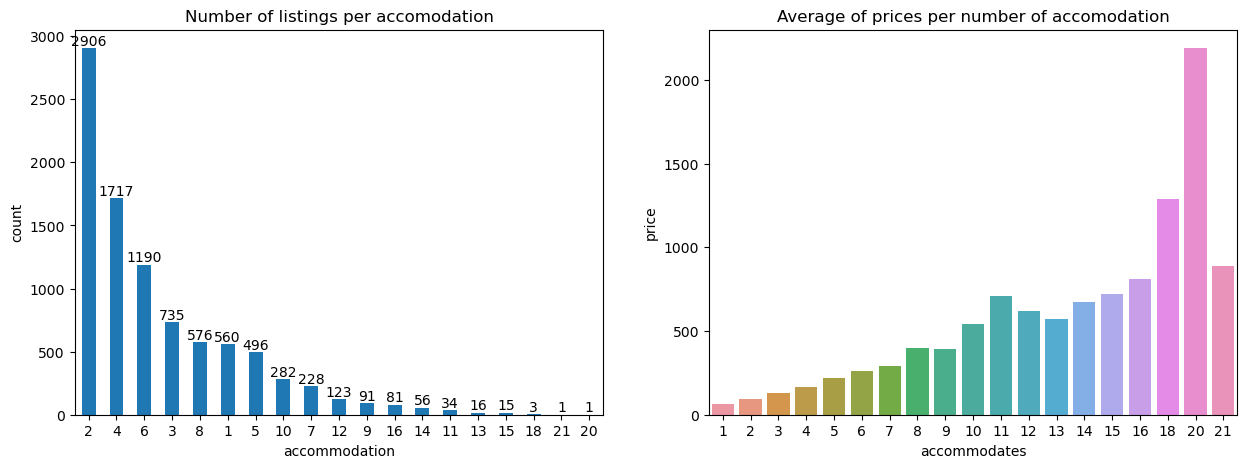

In [5]:
'''
Code to count number of listing and calculating average prices as per number of accomodation. 
Also, to plot the results on a bar plot. 

'''

plot3 = df[['accommodates', 'price']]
# calculating average of prices and plotting the listings per number of bedroom. 
fig, axes = plt.subplots(nrows=1, ncols=2)
# plotting barplot of number of listings per bedroom
acc_plots = plot3['accommodates'].value_counts().plot(kind='bar', figsize=(15, 5), rot=0, ax=axes[0])
# to display the count over every bar
for i in acc_plots.containers:
    acc_plots.bar_label(i,)
# labeling x axis
axes[0].set_xlabel("accommodation")
# labeling y axis
axes[0].set_ylabel("count")
# setting title
axes[0].set_title("Number of listings per accomodation")
# plotting barplot for average of prices per number of accomodation
bp_aco = sb.barplot(ax=axes[1], x='accommodates', y='price', data=plot3, ci=False)
# setting title
axes[1].set_title("Average of prices per number of accomodation")
# saving file
plt.savefig('Number of listings vs accomodation.png', bbox_inches='tight')
plt.show()


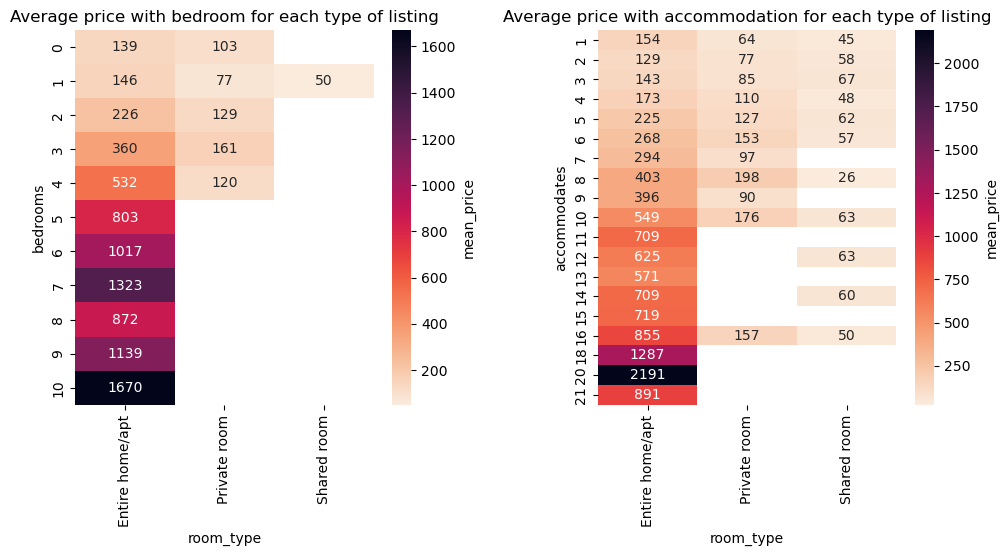

In [6]:
# plot the average price with number of bedrooms for each type of listing
fig, axes = plt.subplots(nrows=1, ncols=2)
h1 = sb.heatmap(df.groupby(['bedrooms','room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'}, ax=axes[0])
axes[0].set_title('Average price with bedroom for each type of listing')
h2 = sb.heatmap(df.groupby(['accommodates','room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'mean_price'}, ax=axes[1])
axes[1].set_title('Average price with accommodation for each type of listing')
plt.savefig('Average price with bedrooms and accomodation for each type of listing.png')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.5,
                    wspace=0.4,
                    hspace=1)
plt.show()


In [7]:
'''
To count number of listing and calculating average prices as per number of neighborhood. 
Also, to plot the results on a bar plot and map. 
'''

import plotly.express as px
import pandas as pd
# collecting required data
nmap = df[['neighborhood', 'price', 'latitude', 'longitude']]
# sorting neighborhood on the basis price
nmap = nmap.groupby('neighborhood', as_index=False)['price','latitude', 'longitude'].mean()
# sorting neighborhood on the basis price
nmap = nmap.sort_values('price')

C:\Users\Sherin Saju\AppData\Local\Temp\ipykernel_13936\808899273.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nmap = nmap.groupby('neighborhood', as_index=False)['price','latitude', 'longitude'].mean()


In [8]:
# plotting the average price per neighbourhood data on intercative map. 

color_scale = [(0, 'green'), (1,'red')]
plt.figure(figsize=(5,5))
fig = px.scatter_mapbox(nmap, lat="latitude", lon="longitude", hover_name="neighborhood", hover_data=["price"],color="price", color_continuous_scale=color_scale, size="price", zoom=8, height=1200, width=1200)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<Figure size 500x500 with 0 Axes>